In [ ]:
!pip install gudhi
!pip install giotto-tda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.6/554.6 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [ ]:
import numpy as np
import gudhi as gd

from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
point_cloud = iris['data']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

point_cloud = MinMaxScaler().fit_transform(point_cloud)

Ici, on va créer la filtration de Rips pour le jeu de donnée Iris. On peut jouer sur la dimension maximale et la distance maximale pour voir les différentes sorties.

In [ ]:
Rips_iris = gd.RipsComplex(points = point_cloud, max_edge_length = 1.0).create_simplex_tree(max_dimension = 3)

Dans cette cellule, on calcule l'homologie de persistance.

In [ ]:
pers = Rips_iris.persistence()

Maintenant, on visualise les résultats:

<Axes: title={'center': 'Persistence barcode'}>

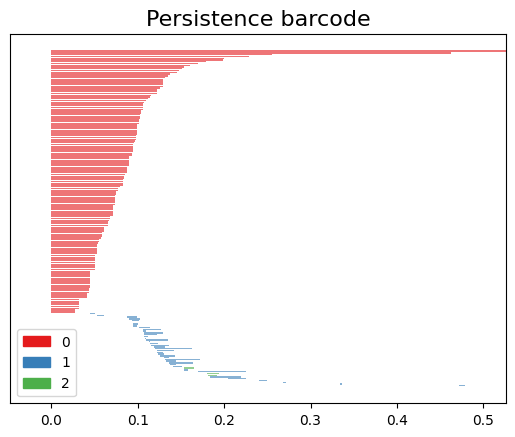

In [ ]:
gd.plot_persistence_barcode(pers)

Les classes de $H_0$ laissent entrevoir deux composantes connexes persistantes.

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

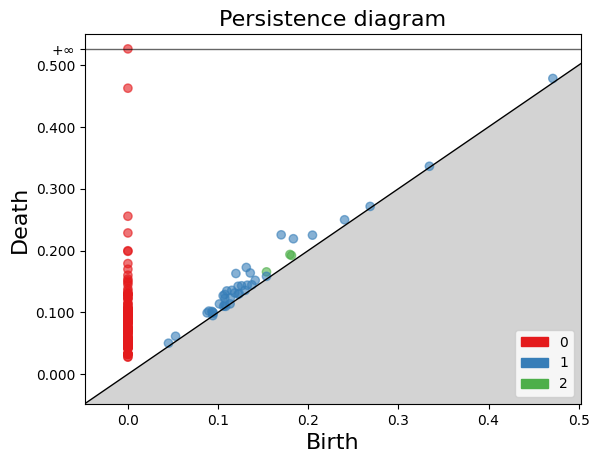

In [ ]:
gd.plot_persistence_diagram(pers)

On va regarder la courbe de $b_0$. Pour cela, on va regarder la courbe de betti sur l'intervalle $[0,\max(death)]$ (et ici $\max(death) = 0.5$).

On calcule la courbe de Betti pour $H_0$ (d'où le "...intervals_in_dimension(0)")

In [ ]:
from gudhi.representations import BettiCurve

bc = BettiCurve(sample_range = [0,0.5]).fit_transform([Rips_iris.persistence_intervals_in_dimension(0)])

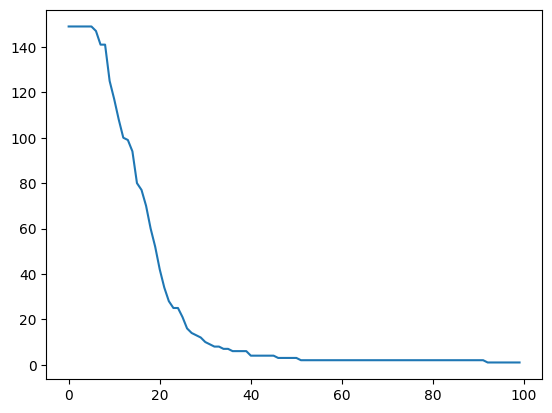

In [ ]:
import matplotlib.pyplot as plt
plt.plot(bc.T)

In [ ]:
bc

NameError: name 'bc' is not defined

On va regarder si il n'y a pas des "cavités de dimension 4" qui se sont formées

In [ ]:
Rips_iris.set_dimension(4)

In [ ]:
pers4 = Rips_iris.persistence()

/usr/local/lib/python3.10/dist-packages/gudhi/persistence_graphical_tools.py:107: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")
/usr/local/lib/python3.10/dist-packages/gudhi/persistence_graphical_tools.py:85: UserWarning: There are 7755256 intervals given as input, whereas max_intervals is set to 20000.
  warnings.warn(


<Axes: title={'center': 'Persistence barcode'}>

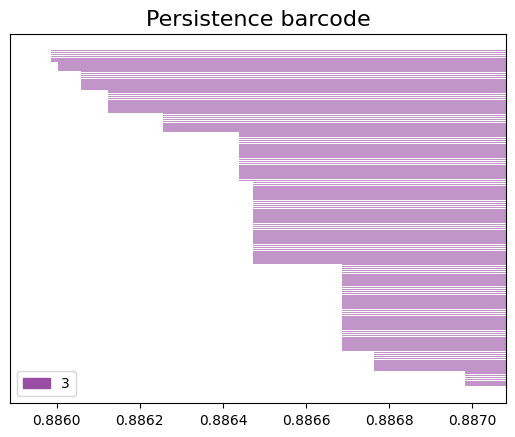

In [ ]:
gd.plot_persistence_barcode(pers4)

/usr/local/lib/python3.10/dist-packages/gudhi/persistence_graphical_tools.py:85: UserWarning: There are 7755256 intervals given as input, whereas max_intervals is set to 1000000.
  warnings.warn(


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

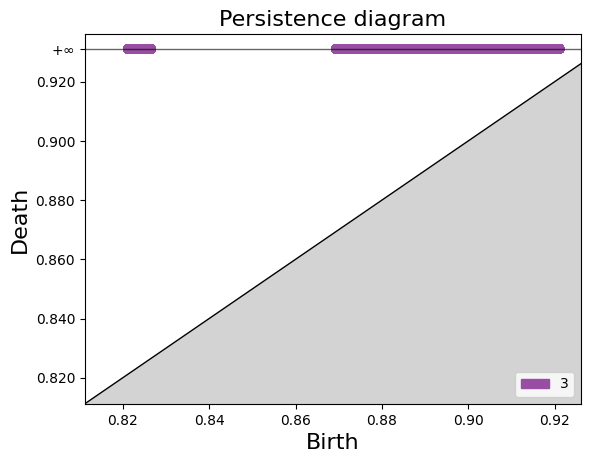

In [ ]:
gd.plot_persistence_diagram(pers4)

# Mapper

On va essayer de créer un autre complexe simplicial: le recouvrement par des ouverts. Pour cela on utilise l'algorithme Mapper (je conseille le package giotto-tda pour mapper)

In [ ]:
from gtda.mapper import *
from sklearn.cluster import DBSCAN

In [ ]:
n_interval = 10
pipe = make_mapper_pipeline(filter_func = None, cover = CubicalCover(n_intervals = n_interval, overlap_frac = 0.3),
                            clusterer = DBSCAN(eps = 0.1),n_jobs=1)

In [ ]:
graph = pipe.fit_transform(point_cloud)

In [ ]:
plotly_params = {"node_trace": {"marker_colorscale":"Blues"}}

fig = plot_static_mapper_graph(pipe, point_cloud, color_data = iris["target"], plotly_params=plotly_params)
fig.show()